In [1]:
import importlib
psfex = importlib.import_module("03_PSFEx")

In [2]:
psfex.run_psfex(config_file = "/home/aurelien/DAWN/DJA_SE++/config/psfex_default.conf",
                cat_name = "/home/aurelien/DAWN/DJA_SE++/JADES-catalog/gds-grizli-v7.0-f444w-clear_drc_star_cat.fits",
                output_cat = "/home/aurelien/DAWN/DJA_SE++/JADES-catalog/gds-grizli-v7.0-f444w-clear_drc_star_psf_cat.fits",
                dir_chckimg = "/home/aurelien/DAWN/DJA_SE++/JADES-checkimages",
                dir_psfex = "/home/aurelien/DAWN/DJA_SE++/JADES-psfex",
                fwhm_range='1.0,100.0', verbose=False)


> WARNING: This executable has been compiled using a version of the ATLAS library without support for multithreading. Performance will be degraded.



'/home/aurelien/DAWN/DJA_SE++/JADES-psfex/gds-grizli-v7.0-f444w-clear_drc_star_cat_psf.psf'


> WARNING: This executable has been compiled using a version of the ATLAS library without support for multithreading. Performance will be degraded.


> WARNING: This executable has been compiled using a version of the ATLAS library without support for multithreading. Performance will be degraded.



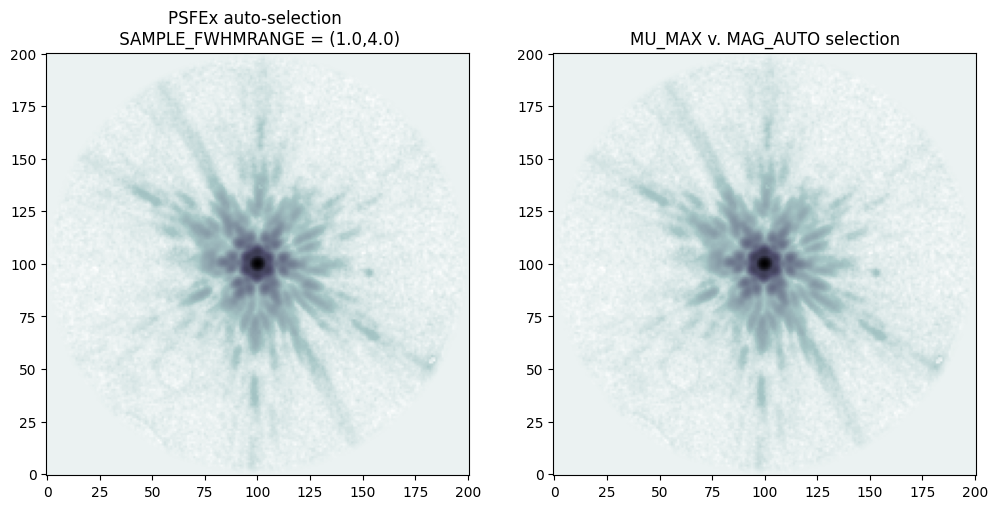

In [12]:
filter = 'f200w'
psfex.compare_star(cat_name = f"/home/aurelien/DAWN/DJA_SE++/JADES-catalog/gds-grizli-v7.0-{filter}-clear_drc_cat.fits",
                   cat_name_star = f"/home/aurelien/DAWN/DJA_SE++/JADES-catalog/gds-grizli-v7.0-{filter}-clear_drc_star_cat.fits",
                   output_cat = f"/home/aurelien/DAWN/DJA_SE++/JADES-catalog/gds-grizli-v7.0-{filter}-clear_drc_psf_cat.fits",
                   output_cat_star = f"/home/aurelien/DAWN/DJA_SE++/JADES-catalog/gds-grizli-v7.0-{filter}-clear_drc_star_psf_cat.fits",
                   dir_chckimg = "/home/aurelien/DAWN/DJA_SE++/JADES-checkimages",
                   dir_psfex = "/home/aurelien/DAWN/DJA_SE++/JADES-psfex",
                   config_file = "/home/aurelien/DAWN/DJA_SE++/config/psfex_default.conf")

## Explanation (to clean-up)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
from astropy.io import fits

In [2]:
config_file = '/home/aurelien/DAWN/DJA_SE++/config/psfex_default.conf'

In [3]:
dir_catalog = '/home/aurelien/DAWN/DJA_SE++/JADES-catalog'
dir_chckimg = '/home/aurelien/DAWN/DJA_SE++/JADES-checkimages'
dir_psfex   = '/home/aurelien/DAWN/DJA_SE++/JADES-psfex'
if not os.path.exists(dir_catalog): os.mkdir(dir_catalog)
if not os.path.exists(dir_chckimg): os.mkdir(dir_chckimg)
if not os.path.exists(dir_psfex)  : os.mkdir(dir_psfex)

In [4]:
study_name = 'gds-grizli-v7.0-f444w-clear_drc'

In [5]:
SE_cat = f"{dir_catalog}/{study_name}_cat.fits"
output_cat = f"{dir_catalog}/{study_name}"
output_chk = f"{dir_chckimg}/{study_name}"

In [6]:
os.system(f'psfex {SE_cat} -c {config_file} \
          -CHECKIMAGE_NAME {output_chk}_ChckImg_chi2.fits,{output_chk}_ChckImg_samp.fits,{output_chk}_ChckImg_res.fits,{output_chk}_ChckImg_snap.fits \
          -CHECKPLOT_NAME {output_chk}_selfwhm,{output_chk}_chi2,{output_chk}_counts \
          -XML_NAME {output_chk}_xml.xml \
          -OUTCAT_NAME {output_cat}_psf_cat.fits \
          -PSF_DIR {dir_psfex}')


> WARNING: This executable has been compiled using a version of the ATLAS library without support for multithreading. Performance will be degraded.

> 
----- PSFEx 3.24.2 started on 2024-04-12 at 14:24:55 with 6 threads

> 
----- 1 input catalogues:
gds-grizli-v7.0-f444:  "no ident        "    1 extension    7497 detections

> Initializing contexts...
> Reading data from gds-grizli-v7.0-f444w-clear_drc_cat...



> WARNING: No source with appropriate FWHM found!!

> Computing final PSF model for gds-grizli-v7.0-f444w-clear_drc_cat...
   filename      [ext] accepted/total samp. chi2/dof FWHM ellip. resi. asym.
> Computing diagnostics for gds-grizli-v7.0-f444w-clear_drc_cat...

> WARNING: No source with appropriate FWHM found!!

gds-grizli-v7.0-f            0/0       1.00   0.00   0.00  0.00  1.00  1.00
> Saving CHECK-image #1...
> Saving CHECK-image #2...
> Saving CHECK-image #3...
> Saving CHECK-image #4...
> Saving PSF model and metadata for gds-grizli-v7.0-f444w-clear_drc_cat...
> Writing XML file...
> 
> All done (in 6.0 s)


0

## Star selection comparison

In [5]:
study_name = 'gds-grizli-v7.0-f444w-clear_drc'

In [6]:
SE_cat = f"{dir_catalog}/{study_name}_cat.fits"
SE_star_cat = f"{dir_catalog}/{study_name}_star_cat.fits"
output_cat = f"{dir_catalog}/{study_name}"
output_chk = f"{dir_chckimg}/{study_name}"

In [9]:
os.system(f'psfex {SE_cat} -c {config_file} \
           -SAMPLE_FWHMRANGE "1.0,6.0" \
          -CHECKIMAGE_NAME {output_chk}_ChckImg_chi2.fits,{output_chk}_ChckImg_samp.fits,{output_chk}_ChckImg_res.fits,{output_chk}_ChckImg_snap.fits \
          -CHECKPLOT_NAME {output_chk}_selfwhm,{output_chk}_chi2,{output_chk}_counts \
          -XML_NAME {output_chk}_xml.xml \
          -OUTCAT_NAME {output_cat}_psf_cat.fits \
          -PSF_DIR {dir_psfex}')


> WARNING: This executable has been compiled using a version of the ATLAS library without support for multithreading. Performance will be degraded.

> 
----- PSFEx 3.24.2 started on 2024-04-12 at 14:49:59 with 6 threads

> 
----- 1 input catalogues:
gds-grizli-v7.0-f444:  "no ident        "    1 extension    7497 detections

> Initializing contexts...
> Reading data from gds-grizli-v7.0-f444w-clear_drc_cat...
> Computing final PSF model for gds-grizli-v7.0-f444w-clear_drc_cat...
   filename      [ext] accepted/total samp. chi2/dof FWHM ellip. resi. asym.
> Computing diagnostics for gds-grizli-v7.0-f444w-clear_drc_cat...
gds-grizli-v7.0-f          232/244     1.00   1.09   3.79  0.02  0.10  0.08
> Saving CHECK-image #1...
> Saving CHECK-image #2...
> Saving CHECK-image #3...
> Saving CHECK-image #4...
> Saving PSF model and metadata for gds-grizli-v7.0-f444w-clear_drc_cat...
> Writing XML file...
> 
> All done (in 8.0 s)


0

In [10]:
os.system(f'psfex {SE_star_cat} -c {config_file} \
          -SAMPLE_FWHMRANGE "1.0,10.0" \
          -CHECKIMAGE_NAME {output_chk}_ChckImg_chi2.fits,{output_chk}_ChckImg_samp.fits,{output_chk}_ChckImg_res.fits,{output_chk}_ChckImg_snap.fits \
          -CHECKPLOT_NAME {output_chk}_selfwhm,{output_chk}_chi2,{output_chk}_counts \
          -XML_NAME {output_chk}_xml.xml \
          -OUTCAT_NAME {output_cat}_star_psf_cat.fits \
          -PSF_DIR {dir_psfex}')


> WARNING: This executable has been compiled using a version of the ATLAS library without support for multithreading. Performance will be degraded.

> 
----- PSFEx 3.24.2 started on 2024-04-12 at 14:50:07 with 6 threads

> 
----- 1 input catalogues:
gds-grizli-v7.0-f444:  "no ident        "    1 extension     302 detections

> Initializing contexts...
> Reading data from gds-grizli-v7.0-f444w-clear_drc_star_cat...
> Computing final PSF model for gds-grizli-v7.0-f444w-clear_drc_star_cat...
   filename      [ext] accepted/total samp. chi2/dof FWHM ellip. resi. asym.
> Computing diagnostics for gds-grizli-v7.0-f444w-clear_drc_star_cat...
gds-grizli-v7.0-f          146/151     1.00   1.21   3.87  0.01  0.05  0.05
> Saving CHECK-image #1...
> Saving CHECK-image #2...
> Saving CHECK-image #3...
> Saving CHECK-image #4...
> Saving PSF model and metadata for gds-grizli-v7.0-f444w-clear_drc_star_cat...
> Writing XML file...
> 
> All done (in 4.0 s)


0

In [9]:
image = fits.open(f"{dir_psfex}/{study_name}_cat_psf.psf")
image_star = fits.open(f"{dir_psfex}/{study_name}_star_cat_psf.psf")
psf = np.array(image[1].data[0][0][0])
psf_star = np.array(image_star[1].data[0][0][0])

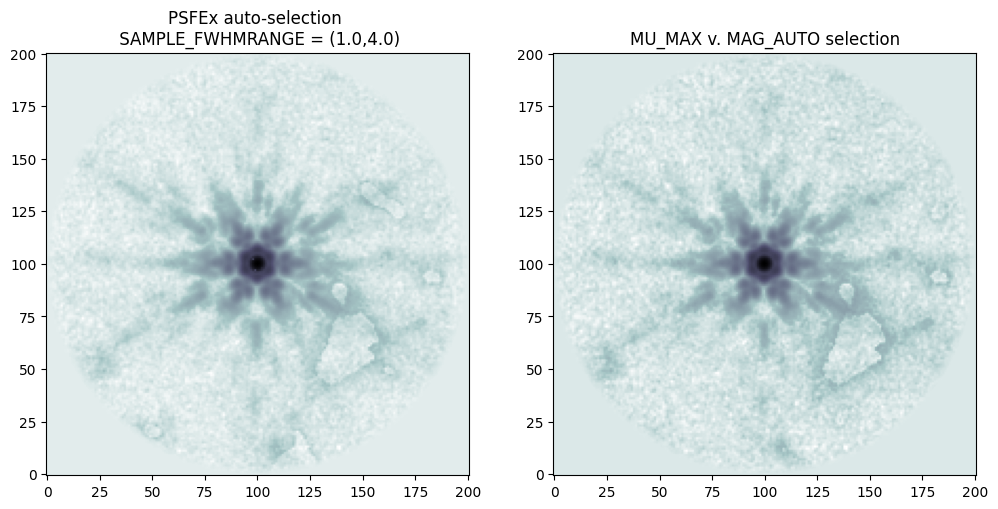

In [10]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(psf, origin='lower', cmap='bone_r', norm=SymLogNorm(linthresh=1e-5, linscale=0.8))
ax[1].imshow(psf_star, origin='lower', cmap='bone_r', norm=SymLogNorm(linthresh=1e-5, linscale=0.8))
ax[0].set_title("PSFEx auto-selection \n SAMPLE_FWHMRANGE = (1.0,4.0)")
ax[1].set_title("MU_MAX v. MAG_AUTO selection")
plt.show()